# 케라스의 순환층

In [1]:
## SimpleRNN 예시 (마지막 타임스텝에 대한 출력 반환)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
## SimpleRNN 예시 (각 타임스텝의 출력을 모은 전체 상태 시퀀스 반환)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
## SimpleRNN 예시 (다중 중간 순환층 + 마지막 시퀀스 반환층)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))  # 중간층들은 전체 출력 시퀀스 반환
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력 반환
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


데이터 로딩..
훈련 시퀀스 :  25000
테스트 시퀀스 :  25000
시퀀스 패딩(samples*time) 적용..
input_train 크기 :  (25000, 500)
input_test 크기 :  (25000, 500)
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 925us/step - loss: 0.6467 - acc: 0.6073 - val_loss: 0.6062 - val_acc: 0.6582
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.4068 - acc: 0.8255 - val_loss: 0.3808 - val_acc: 0.8402
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2989 - acc: 0.8792 - val_loss: 0.3756 - val_acc: 0.8354
Epoch 4/10
20000/20000 [==============================] - 20s 990us/step - loss: 0.2257 - acc: 0.9122 - val_loss: 0.5072 - val_acc: 0.7652
Epoch 5/10
20000/20000 [==============================] - 20s 984us/step - loss: 0.1658 - acc: 0.9380 - val_loss: 0.3743 - val_acc: 0.8564
Epoch 6/10
20000/20000 [==============================] - 20s 987us/step - loss: 0.

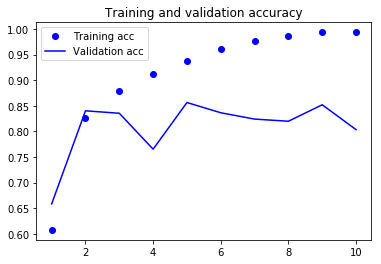

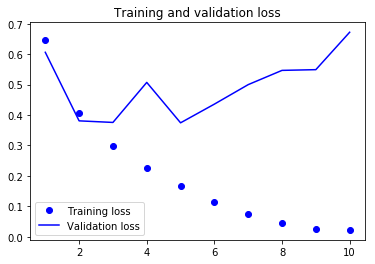

In [4]:
## Embdding + SimpleRNN 기반 IMDB 데이터세트 분석


# 데이터 전처리
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print('훈련 시퀀스 : ', len(input_train))
print('테스트 시퀀스 : ', len(input_test))

print('시퀀스 패딩(samples*time) 적용..')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기 : ', input_train.shape)
print('input_test 크기 : ', input_test.shape)


# 모델 훈련
from keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


# 결과 그래프
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.5128 - acc: 0.7648 - val_loss: 0.3484 - val_acc: 0.8584
Epoch 2/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2951 - acc: 0.8850 - val_loss: 0.3796 - val_acc: 0.8324
Epoch 3/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.2320 - acc: 0.9100 - val_loss: 0.3057 - val_acc: 0.8784
Epoch 4/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.1968 - acc: 0.9269 - val_loss: 0.3843 - val_acc: 0.8534
Epoch 5/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.1711 - acc: 0.9381 - val_loss: 0.2990 - val_acc: 0.8862
Epoch 6/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.1538 - acc: 0.9435 - val_loss: 0.4011 - val_acc: 0.8744
Epoch 7/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.1422 - acc: 0.9504 - val_loss: 0.3661 - val_acc:

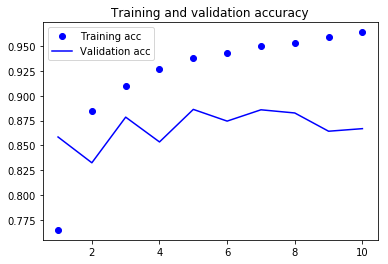

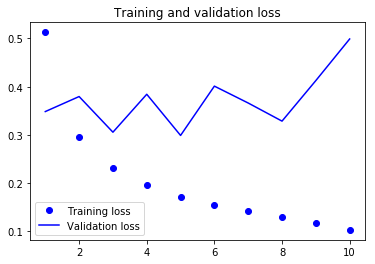

In [5]:
## LSTM 기반 IMDB 데이터세트 분석


# 모델 훈련
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


# 결과 그래프
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()